In [ ]:
#!gdown --id 1nNwIvdyhGlz2o1w-FoP0S6ynpLStpwYp


Saving القروض.csv to القروض (5).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score, ConfusionMatrixDisplay


In [ ]:

df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')


df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

df.shape

(614, 13)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:

df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})

df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [ ]:

df.drop(columns=['Loan_ID'], inplace=True, errors='ignore')


df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Y,False,True
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,False,True


In [ ]:
df[['Property_Area_Semiurban', 'Property_Area_Urban']] = df[['Property_Area_Semiurban', 'Property_Area_Urban']].astype(int)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Y,False,True
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,False,True


In [ ]:

df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-3073610111.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Loan_Status', data=df, palette='viridis')


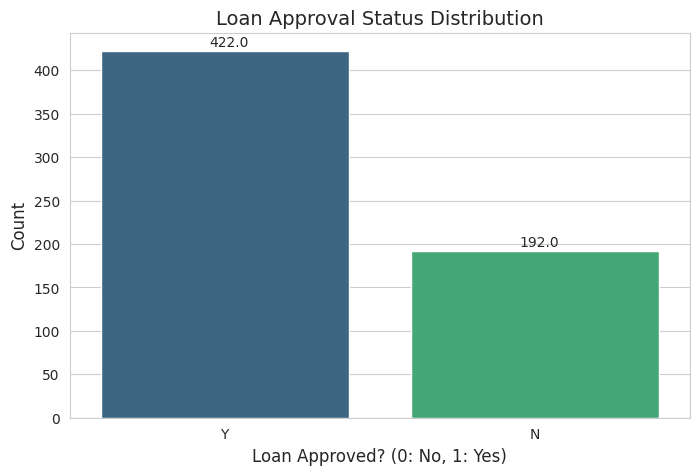

In [ ]:

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")


ax = sns.countplot(x='Loan_Status', data=df, palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.35, p.get_height()+5))

plt.title("Loan Approval Status Distribution", fontsize=14)
plt.xlabel("Loan Approved? (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

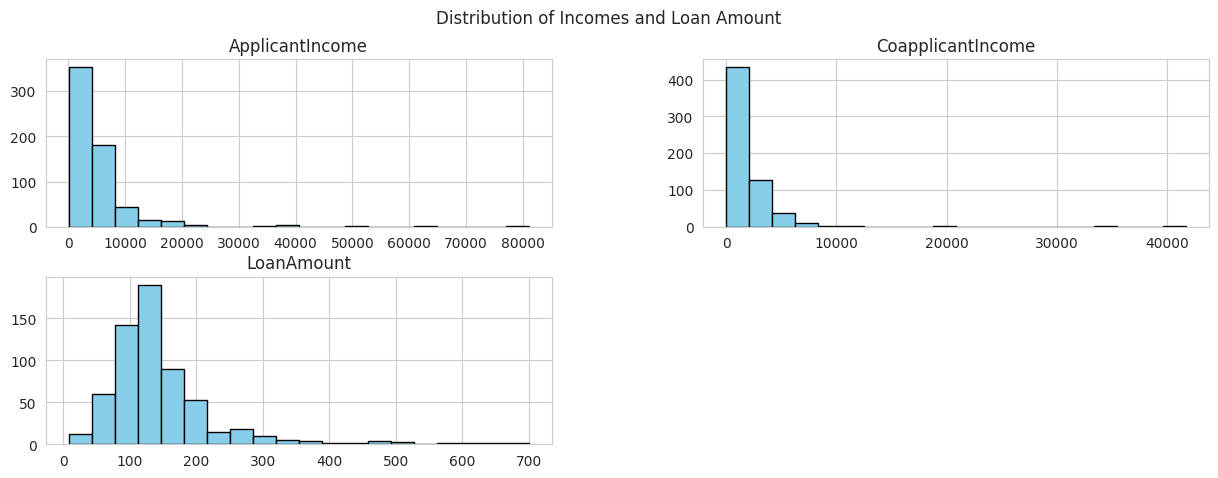

In [ ]:

df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=20, figsize=(15,5), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Incomes and Loan Amount")
plt.show()

In [ ]:
df.to_csv("df_cleaned_v1.csv", index=False)
print("Saved:", "df_cleaned_v1.csv", "Shape:", df.shape)
df_cleaned_v1 = pd.read_csv("/content/df_cleaned_v1.csv")

Saved: df_cleaned_v1.csv Shape: (614, 13)


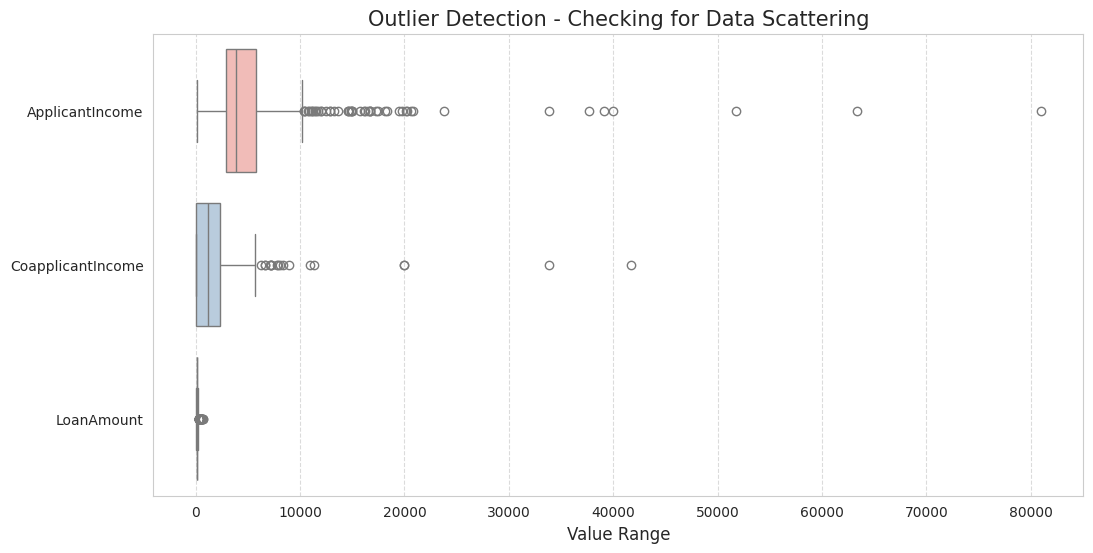

In [ ]:

plt.figure(figsize=(12, 6))


sns.boxplot(data=df_cleaned_v1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']], orient="h", palette="Pastel1")

plt.title('Outlier Detection - Checking for Data Scattering', fontsize=15)
plt.xlabel('Value Range', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import numpy as np

df_cleaned_v1['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df_cleaned_v1['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df_cleaned_v1['LoanAmount_log'] = np.log1p(df['LoanAmount'])

#تحسين البيانات

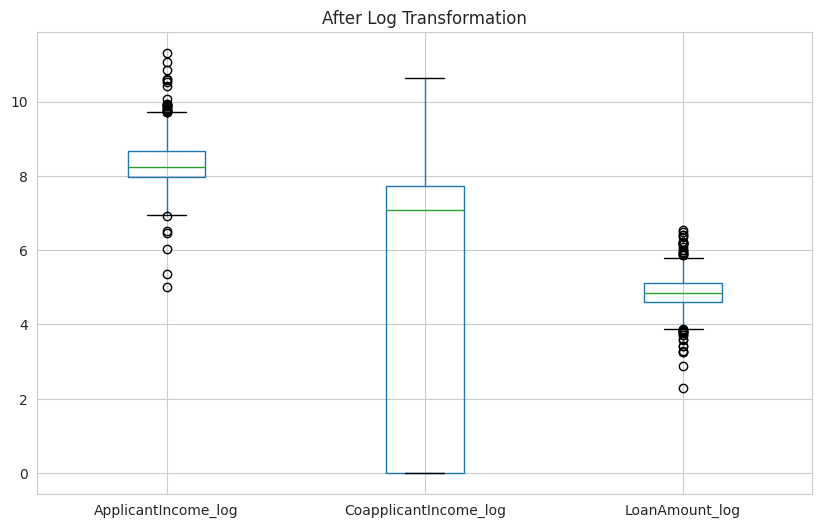

In [ ]:
cols = ['ApplicantIncome_log','CoapplicantIncome_log','LoanAmount_log']
df_cleaned_v1[cols].boxplot(figsize=(10,6))
plt.title("After Log Transformation")
plt.show()

In [ ]:
print(df_cleaned_v1[['ApplicantIncome_log','CoapplicantIncome_log','LoanAmount_log']].isna().sum())

ApplicantIncome_log      0
CoapplicantIncome_log    0
LoanAmount_log           0
dtype: int64


In [ ]:
df_cleaned_v1 = df_cleaned_v1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'], axis=1)

In [ ]:
print(df_cleaned_v1.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome_log',
       'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')


In [ ]:
df_cleaned_v1.to_csv("df_cleaned_v2.csv", index=False)
print("Saved:", "df_cleaned_v2.csv", "Shape:", df.shape)
df_cleaned_v2 = pd.read_csv("/content/df_cleaned_v2.csv")

Saved: df_cleaned_v2.csv Shape: (614, 13)


In [ ]:
df_cleaned_v2 = pd.read_csv("/content/df_cleaned_v2.csv")
print(df_cleaned_v2.shape)
df_cleaned_v2.head()

(614, 13)


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,1,0,0,1,0,360.0,1.0,Y,False,True,8.674197,0.000000,4.859812
1,1,1,1,1,0,360.0,1.0,N,False,False,8.430327,7.319202,4.859812
2,1,1,0,1,1,360.0,1.0,Y,False,True,8.006701,0.000000,4.204693
3,1,1,0,0,0,360.0,1.0,Y,False,True,7.857094,7.765993,4.795791
4,1,0,0,1,0,360.0,1.0,Y,False,True,8.699681,0.000000,4.955827


In [ ]:
df_cleaned_v2['Loan_Status'] = df_cleaned_v2['Loan_Status'].map({'Y':1, 'N':0})

In [ ]:
print(df_cleaned_v2['Loan_Status'].unique())

[1 0]


# تقسيم البيانات

In [ ]:
X = df_cleaned_v2.drop('Loan_Status', axis=1)
y = df_cleaned_v2['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Training:", X_train.shape)
print("Validation:", X_val.shape)
print("Testing:", X_test.shape)

Training: (429, 12)
Validation: (92, 12)
Testing: (93, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

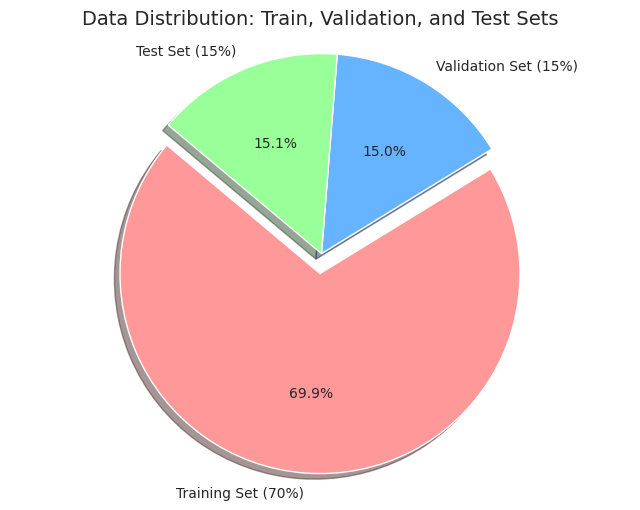

In [ ]:
labels = ['Training Set (70%)', 'Validation Set (15%)', 'Test Set (15%)']
sizes = [len(X_train), len(X_val), len(X_test)]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Data Distribution: Train, Validation, and Test Sets', fontsize=14)
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تدريب SVM بـ RBF
svm_model = SVC(kernel="rbf", C=10, gamma="scale", random_state=42)

svm_model.fit(X_train_std, y_train)

# تقييم على Validation
y_val_pred = svm_model.predict(X_val_std)

print("===== SVM RBF Validation =====")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

===== SVM RBF Validation =====
Validation Accuracy: 0.8043478260869565
Confusion Matrix:
 [[15 14]
 [ 4 59]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.81      0.94      0.87        63

    accuracy                           0.80        92
   macro avg       0.80      0.73      0.75        92
weighted avg       0.80      0.80      0.79        92



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_val_pred = dtree.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.717391304347826
[[19 10]
 [16 47]]
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        29
           1       0.82      0.75      0.78        63

    accuracy                           0.72        92
   macro avg       0.68      0.70      0.69        92
weighted avg       0.74      0.72      0.72        92



#بعد تحسين الخورزميات

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", random_state=42)

svm_model.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_val_pred = svm_model.predict(X_val_std)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8369565217391305
[[14 15]
 [ 0 63]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        29
           1       0.81      1.00      0.89        63

    accuracy                           0.84        92
   macro avg       0.90      0.74      0.77        92
weighted avg       0.87      0.84      0.82        92



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=15,
    random_state=42
)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=15,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_val_pred = dtree.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8152173913043478
[[15 14]
 [ 3 60]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.81      0.95      0.88        63

    accuracy                           0.82        92
   macro avg       0.82      0.73      0.76        92
weighted avg       0.82      0.82      0.80        92



===== SVM Linear - TEST =====
Test Accuracy: 0.8602150537634409
Confusion Matrix:
 [[18 11]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.90      0.62      0.73        29
           1       0.85      0.97      0.91        64

    accuracy                           0.86        93
   macro avg       0.87      0.79      0.82        93
weighted avg       0.87      0.86      0.85        93



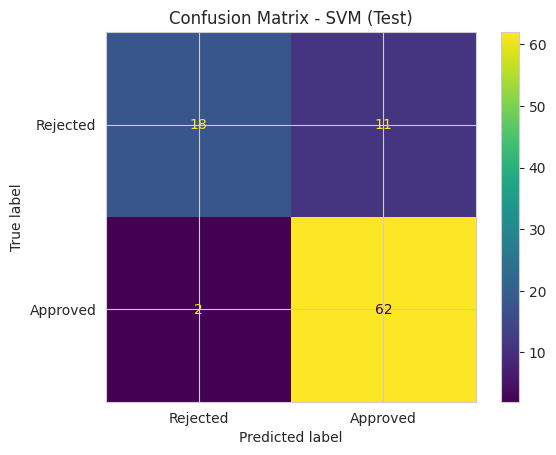

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# توقع على الاختبار
y_test_pred_svm = svm_model.predict(X_test_std)

print("===== SVM Linear - TEST =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

# رسم مصفوفة الالتباس
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, display_labels=["Rejected","Approved"])
plt.title("Confusion Matrix - SVM (Test)")
plt.show()

===== Decision Tree (Tuned) - TEST =====
Test Accuracy: 0.8064516129032258
Confusion Matrix:
 [[19 10]
 [ 8 56]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.85      0.88      0.86        64

    accuracy                           0.81        93
   macro avg       0.78      0.77      0.77        93
weighted avg       0.80      0.81      0.80        93



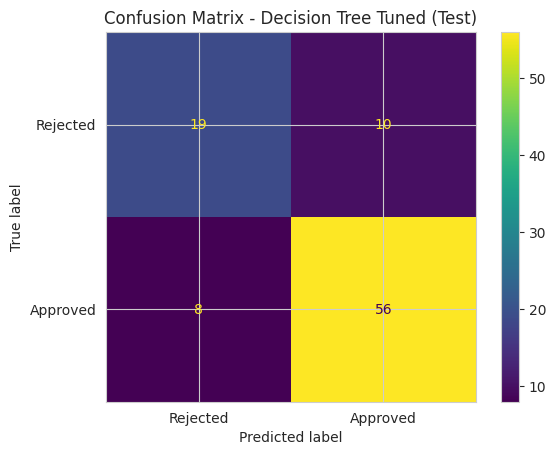

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_best = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    min_samples_split=10,
    criterion="gini",
    random_state=42
)

dt_best.fit(X_train, y_train)

# توقع على الاختبار
y_test_pred_dt = dt_best.predict(X_test)

print("===== Decision Tree (Tuned) - TEST =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt))
print(classification_report(y_test, y_test_pred_dt))

# رسم مصفوفة الالتباس
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_dt, display_labels=["Rejected","Approved"])
plt.title("Confusion Matrix - Decision Tree Tuned (Test)")
plt.show()

In [ ]:
acc_svm = accuracy_score(y_test, y_test_pred_svm)
acc_dt  = accuracy_score(y_test, y_test_pred_dt)

print("\n===== TEST ACCURACY COMPARISON =====")
print("SVM Linear:", round(acc_svm, 4))
print("Decision Tree Tuned:", round(acc_dt, 4))


===== TEST ACCURACY COMPARISON =====
SVM Linear: 0.8602
Decision Tree Tuned: 0.8065


In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. إعداد عناصر الواجهة بألوان متناسقة مع "الثيم الملكي" للمشروع
style = {'description_width': 'initial'}

# العناوين والمدخلات
header = widgets.HTML("<h2 style='color:#880e4f; text-align:center;'> Loan Eligibility Interactive Portal</h2>")
desc = widgets.HTML("<p style='text-align:center;'>Enter the customer details below to get an instant AI decision.</p>")

income_input = widgets.IntText(value=5000, description='Monthly Income ($):', style=style)
co_income_input = widgets.IntText(value=2000, description='Co-applicant Income ($):', style=style)
loan_input = widgets.IntSlider(value=150, min=10, max=500, step=5, description='Loan Amount (k$):', style=style)
term_input = widgets.Dropdown(options=[('30 Years (360 m)', 360), ('15 Years (180 m)', 180), ('10 Years (120 m)', 120)], value=360, description='Loan Term:', style=style)
credit_input = widgets.RadioButtons(options=[('Good History (1)', 1), ('Poor History (0)', 0)], value=1, description='Credit History:')

# زر التوقع (Predict) بتصميم جذاب
predict_button = widgets.Button(
    description='Predict Approval Status',
    button_style='danger', # يعطي لون قريب من البرغندي
    layout=widgets.Layout(width='100%', height='40px')
)

output_area = widgets.Output()

# 2. وظيفة الربط بين الواجهة ودالة المحاكاة (Simulator)
def on_predict_clicked(b):
    with output_area:
        clear_output()
        # استدعاء دالة الـ Simulator الموجودة مسبقاً في ملفك
        try:
            result = loan_approval_simulator(
                income_input.value,
                co_income_input.value,
                loan_input.value,
                credit_input.value,
                term_input.value
            )

            # تنسيق عرض النتيجة النهائية
            color = "#1b5e20" if "Approved" in result else "#b71c1c"
            display(widgets.HTML(f"""
                <div style="border: 2px solid {color}; padding: 15px; border-radius: 10px; background-color: #f1f8e9;">
                    <h3 style="color: {color}; margin: 0;">{result}</h3>
                </div>
            """))
        except NameError:
            print("Error: Make sure 'loan_approval_simulator' function is defined in a previous cell.")

predict_button.on_click(on_predict_clicked)

# 3. تنظيم الواجهة في "صندوق" مرتب (VBox)
final_ui = widgets.VBox([
    header,
    desc,
    widgets.VBox([income_input, co_income_input, loan_input, term_input, credit_input],
                 layout=widgets.Layout(padding='20px', border='1px solid #ddd', margin='10px')),
    predict_button,
    output_area
], layout=widgets.Layout(width='500px', margin='0 auto'))

display(final_ui)